<a href="https://colab.research.google.com/github/iamnileshmehta/Deep-Learning-Projects/blob/main/Deep_Learning_California_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Move the Kaggle API key to the correct directory in Colab
!mkdir -p ~/.kaggle
!cp '/content/drive/MyDrive/datasets/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d harrywang/housing

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 83.5MB/s]


In [ ]:
!unzip \housing.zip && rm housing.zip

Archive:  housing.zip
  inflating: anscombe.csv            
  inflating: housing.csv             


In [ ]:
import pandas as pd

data = pd.read_csv('housing.csv')

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
lb = LabelEncoder()
data.ocean_proximity = lb.fit_transform(data.ocean_proximity)

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

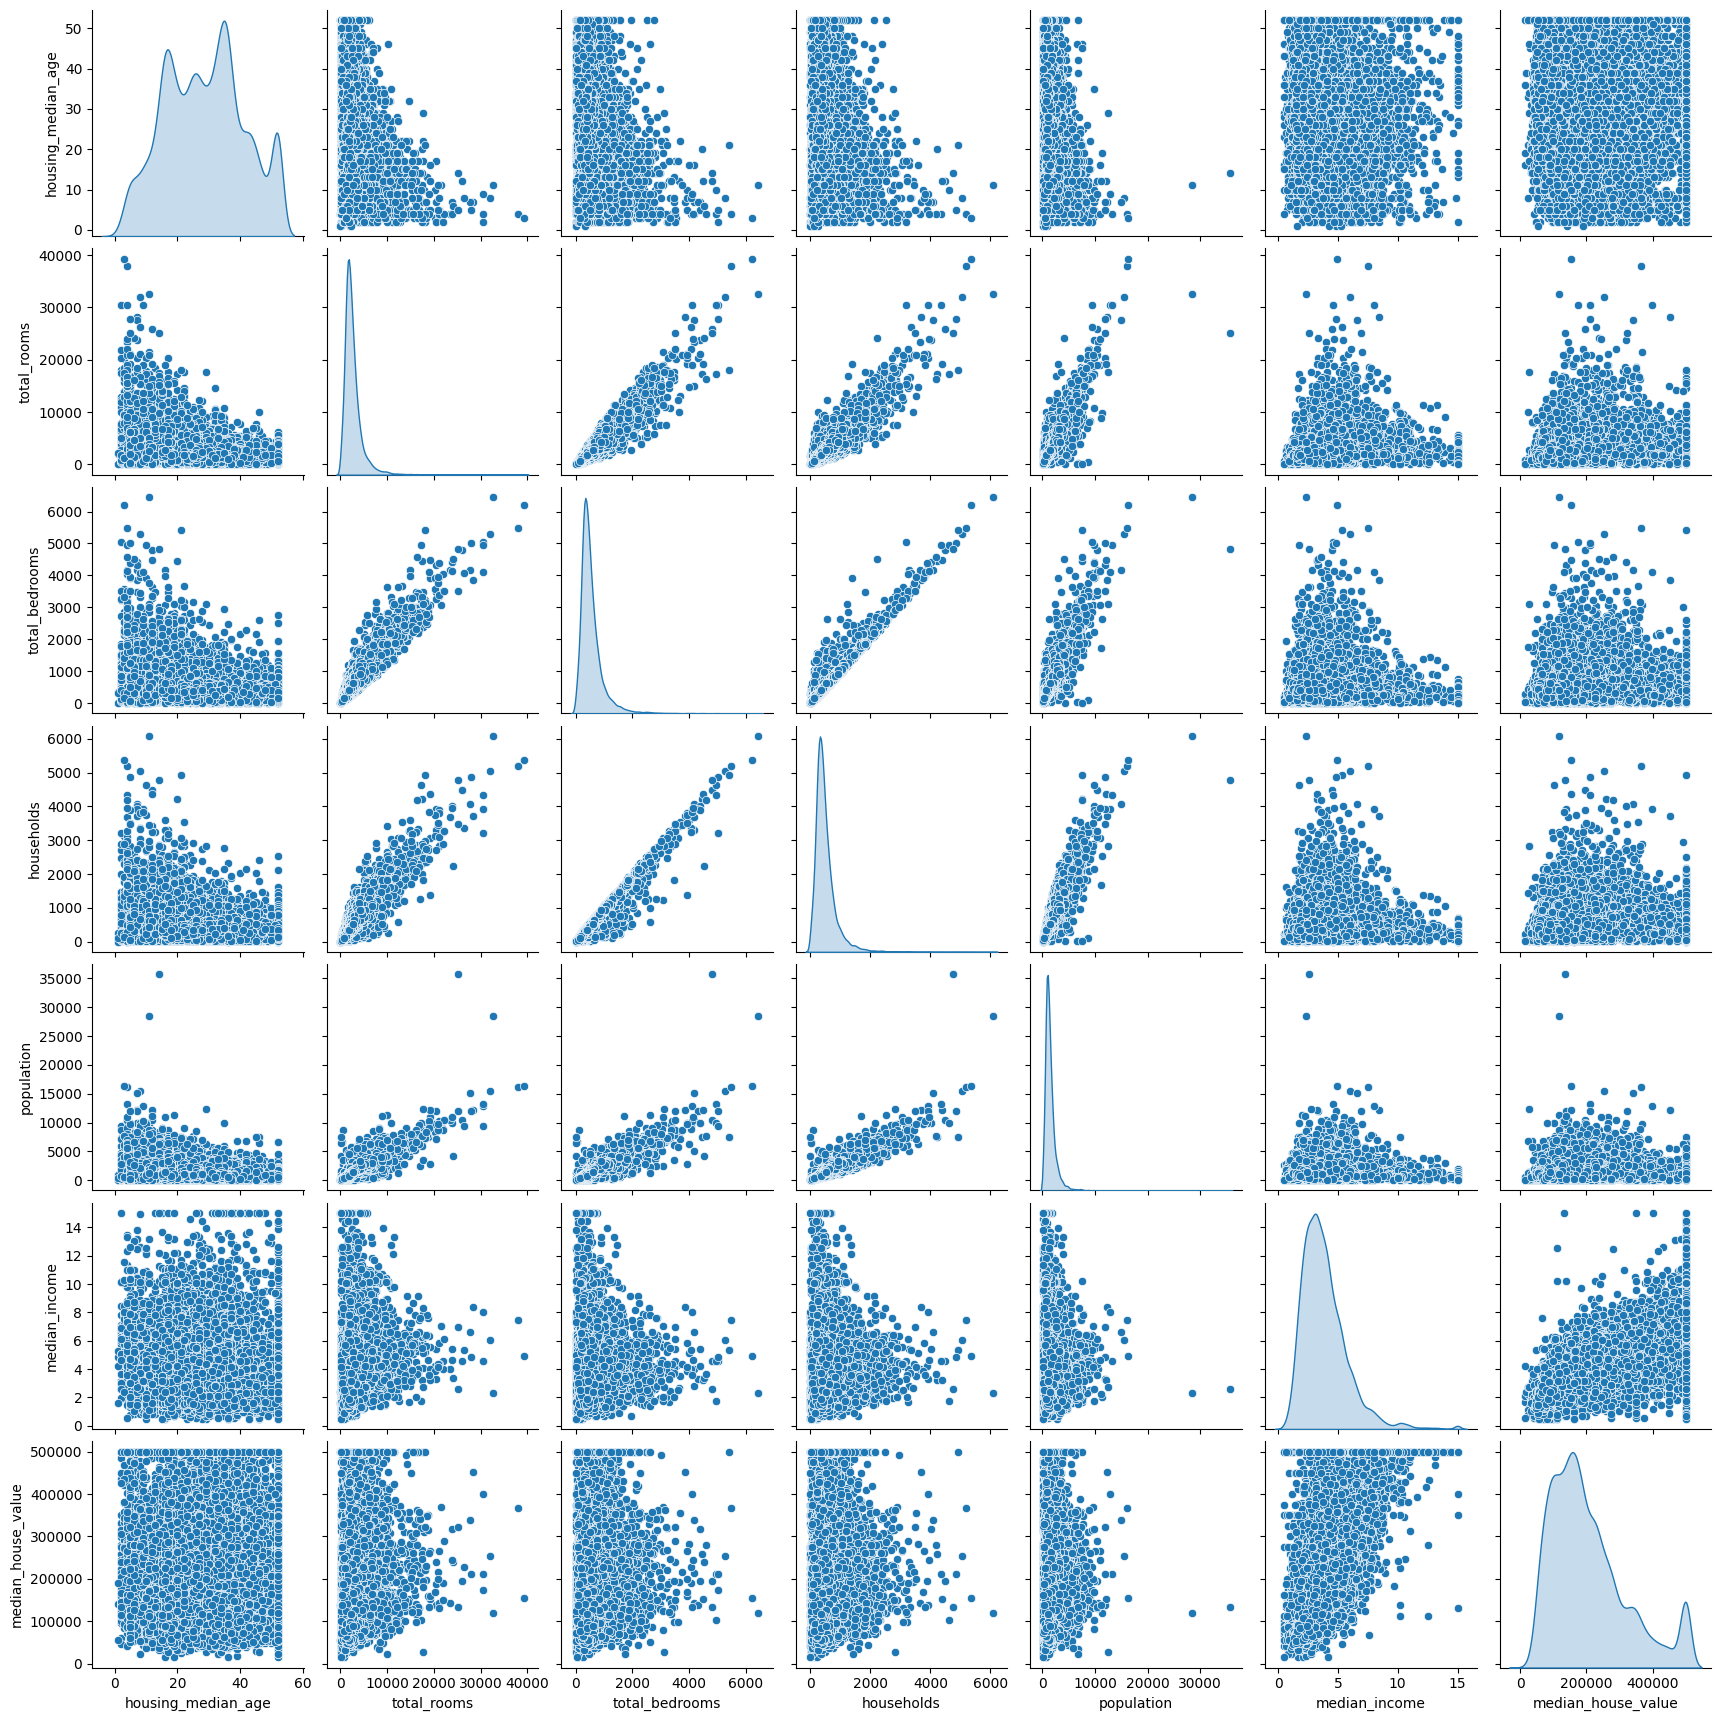

In [ ]:
sns.pairplot(data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'population', 'median_income', 'median_house_value']], diag_kind = 'kde')
plt.show()


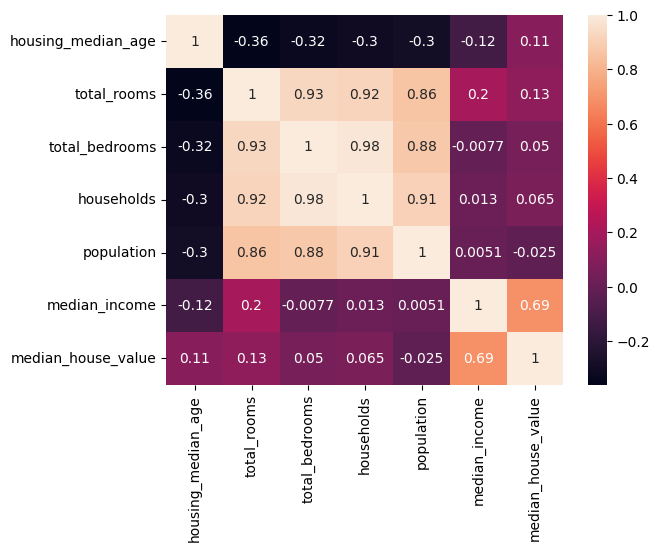

In [ ]:
columns = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'households', 'population', 'median_income', 'median_house_value']

correlation = data[columns].corr()

sns.heatmap(correlation, annot=True)
plt.show()

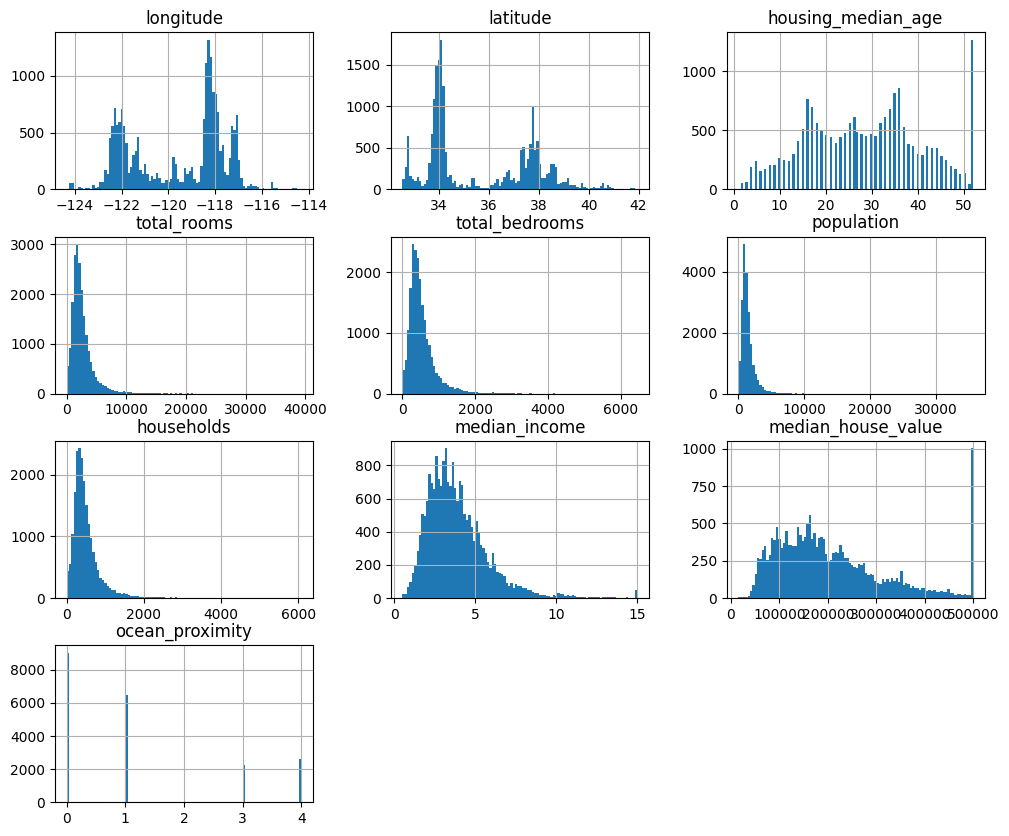

In [ ]:

data.hist(bins=100, figsize=(12, 10))
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('median_house_value', axis=1),
                                                    data.median_house_value, test_size=0.3, random_state = 42)

In [ ]:
x_train.shape

(14303, 9)

In [ ]:
len(x_train.keys())

9

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model= keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[len(x_train.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [ ]:
optimizer= tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer= optimizer, metrics=['mae','mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17921 (70.00 KB)
Trainable params: 17921 (70.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
!pip install tensorflow_docs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
EPOCHS = 200

history = model.fit(
    x_train, y_train, epochs=EPOCHS, validation_split = 0.2, verbose= 0, callbacks= [tensorflow_docs.modeling.EpochDots(20)]
)


Epoch: 0, loss:31954186240.0000,  mae:134242.9531,  mse:31954186240.0000,  val_loss:25417074688.0000,  val_mae:115065.5000,  val_mse:25417074688.0000,  
....................
Epoch: 20, loss:7679785984.0000,  mae:67812.5781,  mse:7679785984.0000,  val_loss:7670478336.0000,  val_mae:67502.7891,  val_mse:7670478336.0000,  
....................
Epoch: 40, loss:6119386624.0000,  mae:58987.4062,  mse:6119386624.0000,  val_loss:7026194432.0000,  val_mae:65140.1602,  val_mse:7026194432.0000,  
....................
Epoch: 60, loss:5253306880.0000,  mae:53689.3203,  mse:5253306880.0000,  val_loss:5405224448.0000,  val_mae:55775.0898,  val_mse:5405224448.0000,  
....................
Epoch: 80, loss:4925290496.0000,  mae:51888.0977,  mse:4925290496.0000,  val_loss:5028248576.0000,  val_mae:53486.8828,  val_mse:5028248576.0000,  
....................
Epoch: 100, loss:4733403648.0000,  mae:50728.5898,  mse:4733403648.0000,  val_loss:4658103808.0000,  val_mae:50714.0625,  val_mse:4658103808.0000,  


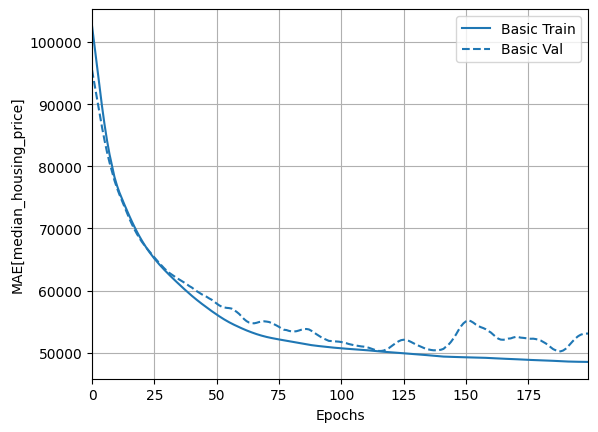

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric= 'mae')

plt.ylabel('MAE[median_housing_price]')
plt.show()

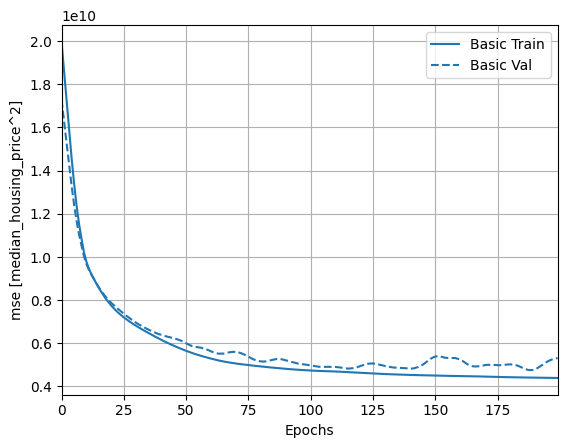

In [ ]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylabel('mse [median_housing_price^2]')
plt.show()

192/192 [==============================] - 1s 4ms/step


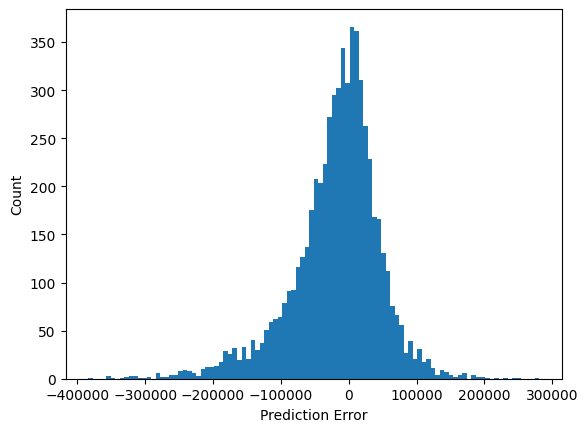

In [ ]:
test_predictions = model.predict(x_test).flatten()
error = test_predictions - y_test
plt.hist(error, bins = 100)
plt.xlabel('Prediction Error')
plt.ylabel('Count')
plt.show()